In [34]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

In [35]:
# Read data
train =  pd.read_csv("loan_train.csv")

In [36]:
train.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Dependents 

In [37]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [38]:
# replacing 3+ in Dependents variable with 3
train['Dependents'].replace(to_replace ='3+', value='3',inplace=True)

In [39]:
train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

#### Loan_Status

In [40]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['LoanStatus'].replace(to_replace =['N','Y'], value=[0,1],inplace=True)

### Missing value and outlier treatment

In [41]:
# Checking the missing values
s = train.isnull().sum()
s [ s > 0]

Gender            13
Married            3
Dependents        15
SelfEmployed      32
LoanAmount        22
LoanAmountTerm    14
CreditHistory     50
dtype: int64

In [42]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [43]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['SelfEmployed'].fillna(train['SelfEmployed'].mode()[0], inplace=True)
train['CreditHistory'].fillna(train['CreditHistory'].mode()[0], inplace=True)

In [44]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [45]:
train['LoanAmountTerm'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: LoanAmountTerm, dtype: int64

In [46]:
train['LoanAmountTerm'].fillna(train['LoanAmountTerm'].mode()[0], inplace=True)

In [47]:
train.LoanAmount.median(), train.LoanAmount.mean()

(128.0, 146.41216216216216)

In [48]:
# Replace missing values
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [49]:
train.isnull().sum()

LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

### Handle outliers in LoanAmount, ApplicantIncome, CoApplicantIncome 

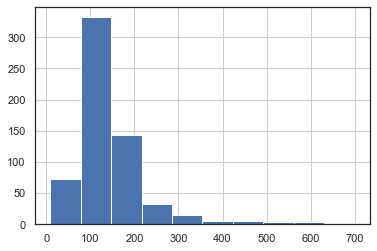

In [50]:
train['LoanAmount'].hist(bins=10)

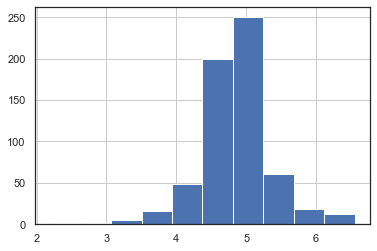

In [51]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmountLog'] = np.log(train['LoanAmount'])
train['LoanAmountLog'].hist(bins=10)

In [53]:
# Add income feature which is ApplicantIncome + CoApplicantIncome 
train['Income'] = train.ApplicantIncome + train.CoapplicantIncome

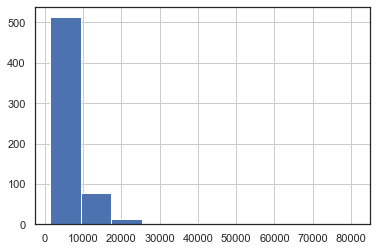

In [54]:
train['Income'].hist(bins=10)

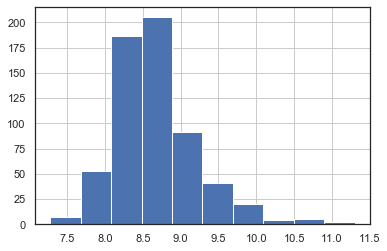

In [55]:
# Removing skewness in Income variable by log transformation
train['IncomeLog'] = np.log(train['Income'])
train['IncomeLog'].hist(bins=10)

In [56]:
# Drop loan_ID column 
train=train.drop('LoanID',axis=1)

In [57]:
train = train.drop(['LoanAmount','ApplicantIncome','CoapplicantIncome', 'Income'],axis=1)

In [58]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus',
       'LoanAmountLog', 'IncomeLog'],
      dtype='object')

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender            614 non-null object
Married           614 non-null object
Dependents        614 non-null object
Education         614 non-null object
SelfEmployed      614 non-null object
LoanAmountTerm    614 non-null float64
CreditHistory     614 non-null float64
PropertyArea      614 non-null object
LoanStatus        614 non-null int64
LoanAmountLog     614 non-null float64
IncomeLog         614 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [60]:
# Adding dummies to the dataset for all categorical features 
train=pd.get_dummies(train)

In [61]:
train.columns

Index(['LoanAmountTerm', 'CreditHistory', 'LoanStatus', 'LoanAmountLog',
       'IncomeLog', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_Graduate', 'Education_Not Graduate',
       'SelfEmployed_No', 'SelfEmployed_Yes', 'PropertyArea_Rural',
       'PropertyArea_Semiurban', 'PropertyArea_Urban'],
      dtype='object')

In [62]:
train.head()

,LoanAmountTerm,CreditHistory,LoanStatus,LoanAmountLog,IncomeLog,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,SelfEmployed_No,SelfEmployed_Yes,PropertyArea_Rural,PropertyArea_Semiurban,PropertyArea_Urban
0,360.0,1.0,1,4.852030,8.674026,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,360.0,1.0,0,4.852030,8.714568,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,360.0,1.0,1,4.189655,8.006368,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,360.0,1.0,1,4.787492,8.505323,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,360.0,1.0,1,4.948760,8.699515,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [65]:
# Save dataframe after data wrangling 
train.to_csv("final_loan_train.csv",index=False)